## Community Detection 
using modularity maximization algorithms 
- Clauset-Newman-Moore (CNM)
- Louvain
- Leiden


generate synthetic network using `Lancichinetti-Fortunato-Radicchi (LFR)` benchmarks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [44]:
from cdlib import algorithms , evaluation
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

In [81]:
from sklearn.metrics import normalized_mutual_info_score


In [42]:
def draw_graph_com(G,coms,colors=None,fig_size=(8,8)):
    
    color_map = {} # map vertex to community to be used as color map
    for i,com in enumerate(coms):
        for v in com:
            color_map[v] = i 
    plt.figure(figsize=fig_size)
    nx.draw(G,cmap=plt.get_cmap('viridis'),node_color=[color_map[v] for v in G.nodes],with_labels=True)
    plt.show()

In [73]:
type(G)

networkx.classes.graph.Graph

In [ ]:
def benchmark(G,algs):
    result = []
    for a in algs:
        result.append()

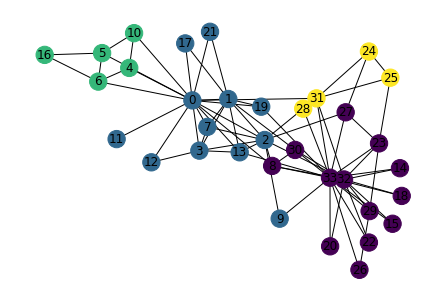

In [7]:
G = nx.karate_club_graph()
coms = algorithms.louvain(G,weight='weight',resolution=1.,randomize=False)

draw_graph_com(G,coms.communities)

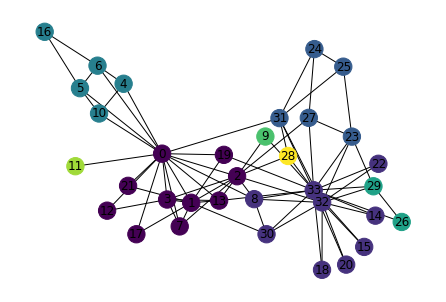

In [9]:
G = nx.karate_club_graph()
coms = algorithms.surprise_communities(G)

draw_graph_com(G,coms.communities)

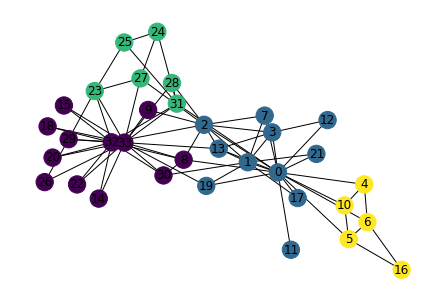

In [10]:
G = nx.karate_club_graph()
coms = algorithms.leiden(G)

draw_graph_com(G,coms.communities)

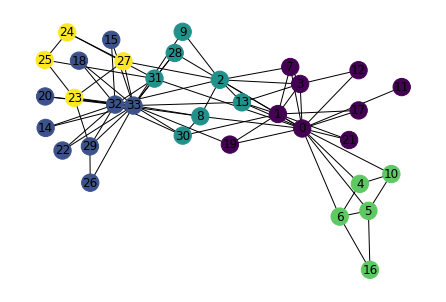

In [11]:
G = nx.karate_club_graph()
coms = algorithms.walktrap(G)

draw_graph_com(G,coms.communities)

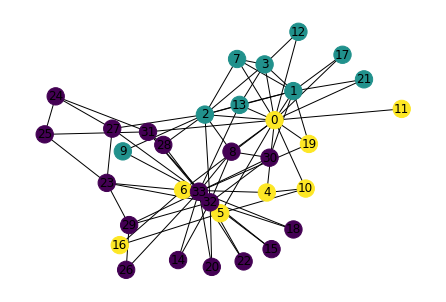

In [12]:
#Clauset-Newman-Moore
G = nx.karate_club_graph()
coms = algorithms.greedy_modularity(G)

draw_graph_com(G,coms.communities)

## LFR benchmark

In [15]:
from networkx.generators.community import LFR_benchmark_graph as lfr

In [90]:
from cdlib.benchmark import LFR
n = 250
tau1 = 3
tau2 = 1.5
mu = 0.1
G, coms = LFR(n, tau1, tau2, mu, average_degree=5, min_community=20)

In [17]:
# parameters
n = 250
tau1 = 3
tau2 = 1.5
mu = 0.1
G = lfr(
    n, tau1, tau2, mu, average_degree=5, min_community=20, seed=10
)

In [112]:
n = 250
tau1 = 3
tau2 = 1.5
mu = 0.1
G = lfr(
    n, tau1, tau2, mu, average_degree=5, min_community=20, seed=10
)

In [ ]:
draw_graph_com(G,)

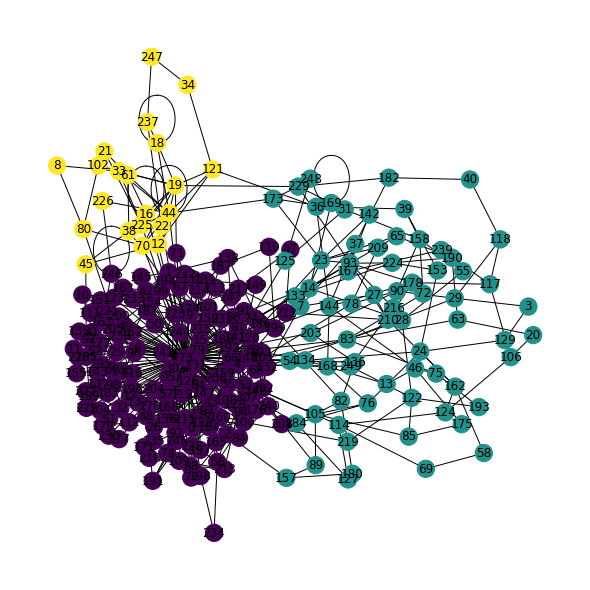

In [113]:
draw_graph_com(G,to_community_list(G))

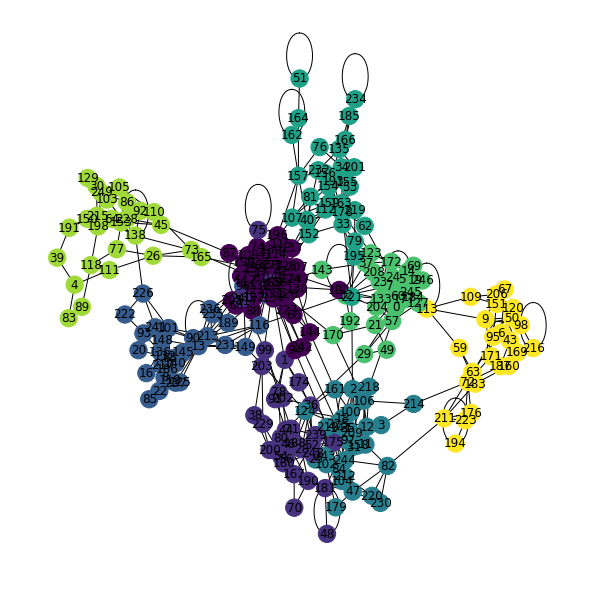

In [92]:
coms = algorithms.leiden(G)

draw_graph_com(G,coms.communities)

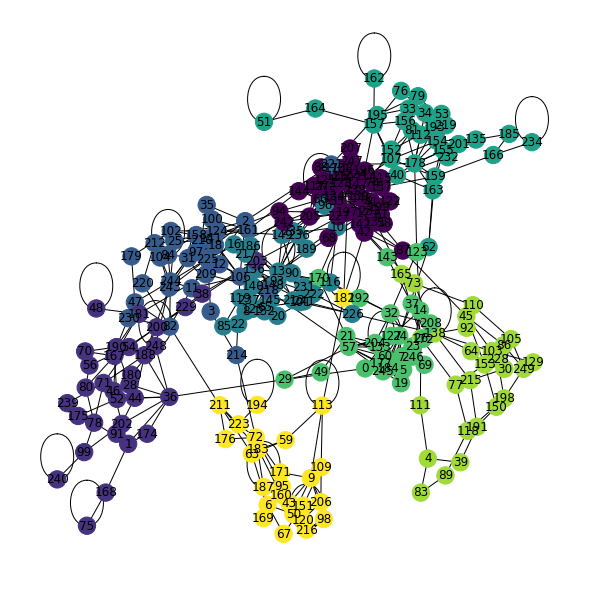

In [93]:
coms = algorithms.louvain(G,weight='weight',resolution=1.,randomize=False)

draw_graph_com(G,coms.communities)

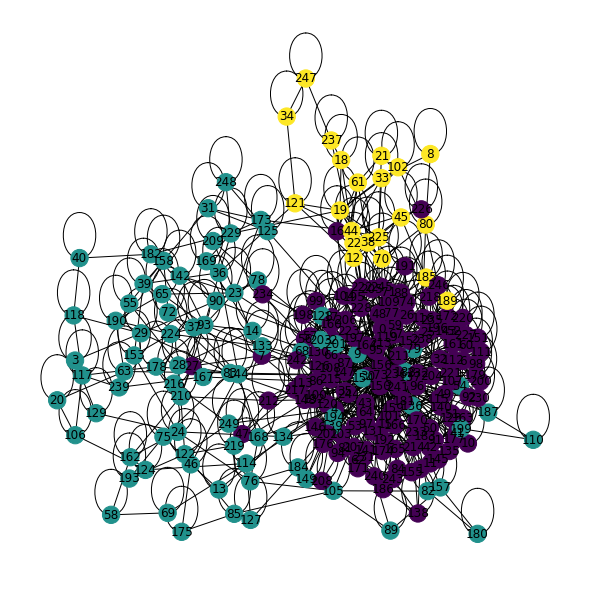

In [115]:
coms = algorithms.paris(G)

draw_graph_com(G,coms.communities)

In [36]:
def to_community_list(G):
    #Assumption: communities are disjoint
    l=[]
    visited=set()
    for v in G:
        if v not in visited:
            temp = [node for node in G.nodes[v]["community"]]
            l.append(temp)
            for t in temp:
                visited.add(t)
    return l      

In [67]:
def to_vertex_community(coms):
    return [
        x[1]
        for x in sorted(
            [
                (node, nid)
                for nid, cluster in enumerate(coms)
                for node in cluster
            ],
            key=lambda x: x[0],
        )
    ]

In [45]:
y_true = to_community_list(G)

In [47]:
coms

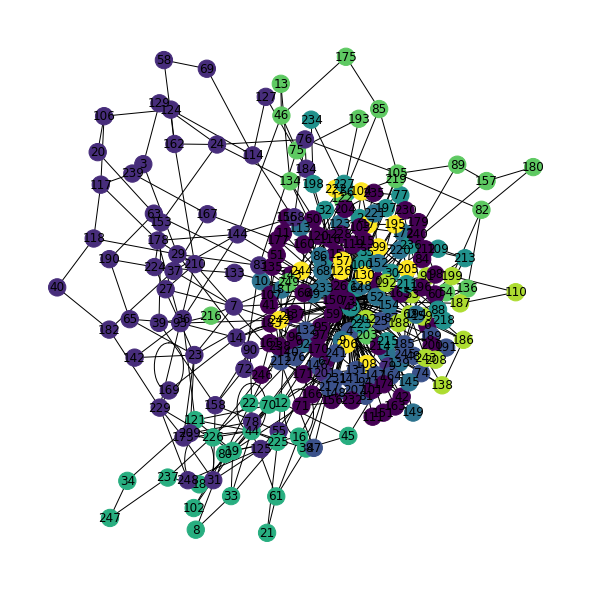

In [48]:
coms = algorithms.louvain(G,weight='weight',resolution=1.,randomize=False)

draw_graph_com(G,coms.communities)

In [69]:
evaluation.normalized_mutual_information()


TypeError: 'NodeClustering' object is not iterable

In [52]:
from sklearn.metrics import normalized_mutual_info_score

In [72]:
normalized_mutual_info_score(to_vertex_community(y_true),to_vertex_community(coms.communities))

0.5666286886324403

In [80]:
def normalized_mutual_info_acc(coms_pred, coms_true):
    return normalized_mutual_info_score(
        to_vertex_community(coms_true), to_vertex_community(coms_pred)
    )


In [92]:
# parameters
n = 500
tau1 = 3
tau2 = 1.5
mu = 0.1
G = lfr(
    n, tau1, tau2, mu, average_degree=5, min_community=100, seed=10
)
com_true = to_community_list(G)

coms_louvain = algorithms.louvain(G,weight='weight',resolution=1.,randomize=False)
coms_leiden = algorithms.leiden(G)
coms_CNM = algorithms.greedy_modularity(G)
coms_wt = algorithms.walktrap(G)

com_algs = {'louvain':coms_louvain,'leiden':coms_leiden , 'CNM' : coms_CNM,'wt':coms_wt}

for ca in com_algs:
    print(f"{ca} NMI: {normalized_mutual_info_acc(com_algs[ca].communities,com_true)}")

louvain NMI: 0.8723932603410466
leiden NMI: 0.9495666819359518
CNM NMI: 0.966446547705005
wt NMI: 0.9661313185425415


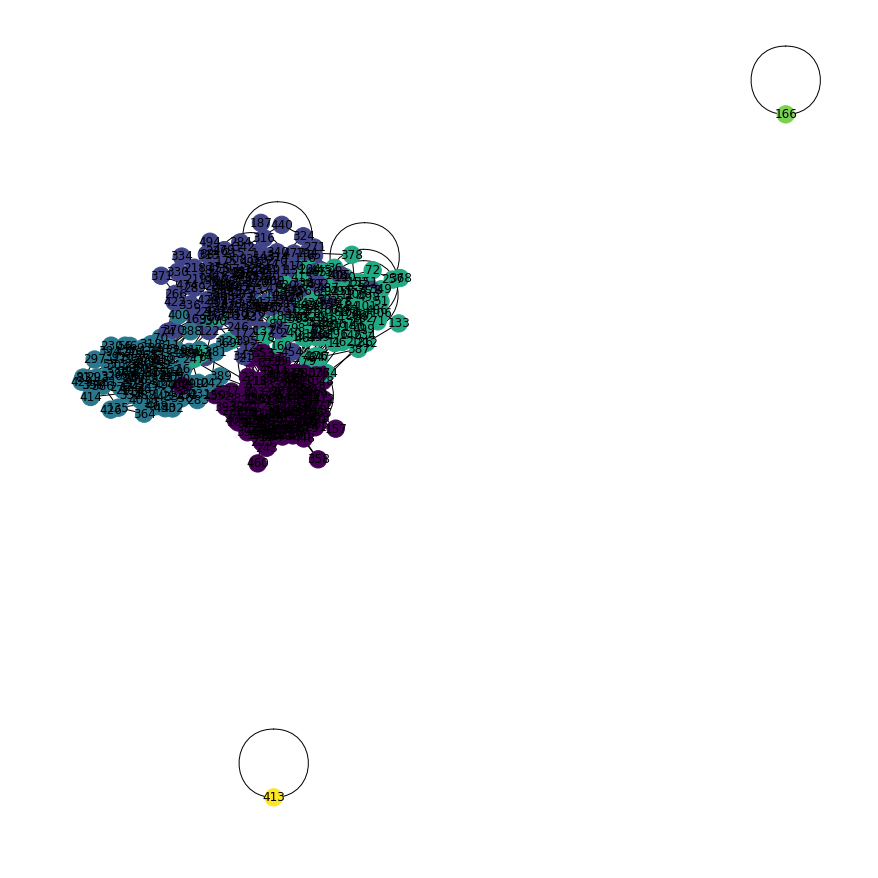

In [93]:
draw_graph_com(G,com_algs['louvain'].communities,fig_size=(12,12))

## Exp1:
    generate LFR using uniform distribution in parameters
    

In [1]:
import numpy as np
from CD_util import *

In [98]:
import time

In [99]:
time.time()

1638869577.7269979

In [146]:
def generate_graph(n_low=250,n_high=10000):
    n = np.random.randint(n_low,n_high)
    tau1 = 3
    tau2 = 1.5
    mu = np.random.uniform(0.03,0.75)
    max_degree = int(0.1*n)
    max_community = int(0.1*n)
    average_degree = 20
    G = lfr(
        n, tau1, tau2, mu, average_degree=average_degree, max_community=max_community,max_degree=max_degree, seed=10,
    )
    return G 

In [145]:
generate_graph(250,300)

TypeError: generate_graph() takes 0 positional arguments but 2 were given

In [ ]:
# n in [10,200], tau in [2,5], tau2 in [1.1,2], mu in [0.05,0.3]
num_trails = 10
metric = []
params = []
graphs = []

sizes = [250, 500, 600, 700, 800, 900, 1000, 1200, 2000, 2500, 2800, 3000,5000,8000,10000]
for j in range(1,len(sizes)):
    metric_sub = []
    params_sub = []
    graphs_sub = []
    for i in range(num_trails):

        try:
            now=time.time()
            G = generate_graph(sizes[j-1],sizes[j])
            graph_gen_time = time.time()-now
            print("graph generated")

        #construct graph

            params_sub.append(len(G.degree))
            graphs_sub.append(G)
            #experiment


            com_true = to_community_list(G)

            now=time.time()
            coms_louvain = algorithms.louvain(G,weight='weight',resolution=1.,randomize=False)
            coms_louvain_delay = time.time()-now

            now=time.time()
            coms_leiden = algorithms.leiden(G)
            coms_leiden_delay = time.time()-now

            now=time.time()
            coms_CNM = algorithms.greedy_modularity(G)
            coms_CNM_delay = time.time()-now

            now=time.time()
            coms_eig = algorithms.eigenvector(G)
            coms_eig_delay=time.time()-now

            now=time.time()
            coms_paris = algorithms.paris(G)
            coms_paris_delay=time.time()-now

            com_algs = {'louvain':(coms_louvain,coms_louvain_delay),'leiden':(coms_leiden,coms_leiden_delay), 
                        'CNM' : (coms_CNM , coms_CNM_delay),'eig':(coms_eig,coms_eig_delay),'paris':(coms_paris,coms_paris_delay)}
            result = {}
            for ca in com_algs:
                result[ca] = (normalized_mutual_info_acc(com_algs[ca][0].communities,com_true),com_algs[ca][1])

            metric_sub.append(result)
            
        except:
            print("error")
            continue
        
    metric.append(metric_sub)
    params.append(params_sub)
    graphs.append(graphs_sub)

graph generated
error
graph generated
error
error
graph generated
error
error
error
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
error
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
error
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
error
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
error
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
graph generated
error
graph generated
graph generated
graph generated
graph generated
graph 

In [148]:
len(metric)

100

In [150]:
j

11

In [164]:
running_time_std

[0.03701596035434178,
 0.03557325014594697,
 0.04075676523152281,
 0.04485416669640196,
 0.057476472142940035,
 0.05312243516949518,
 0.15563894742139356,
 0.23957979909449575,
 0.20504434214926695,
 0.19549838115369322]

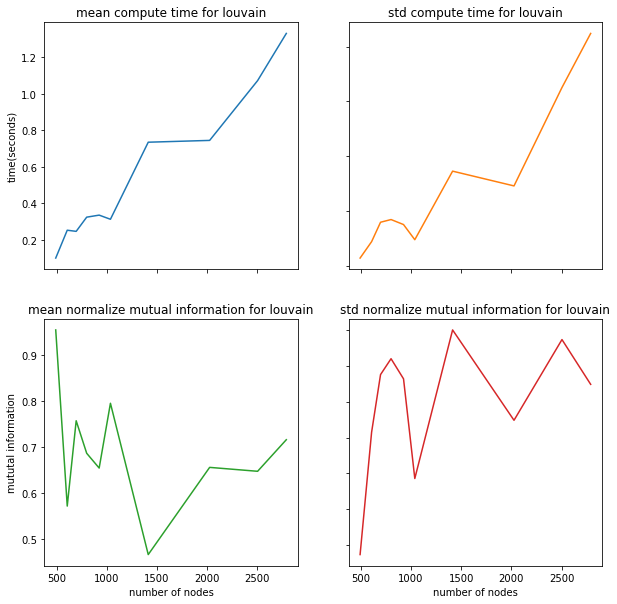

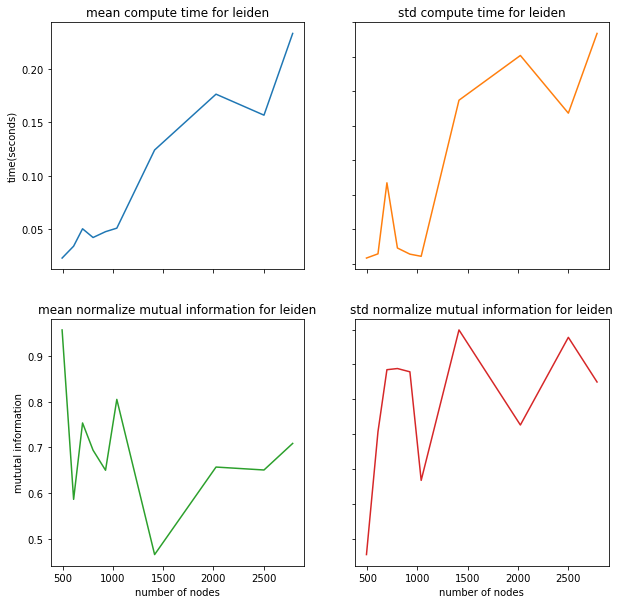

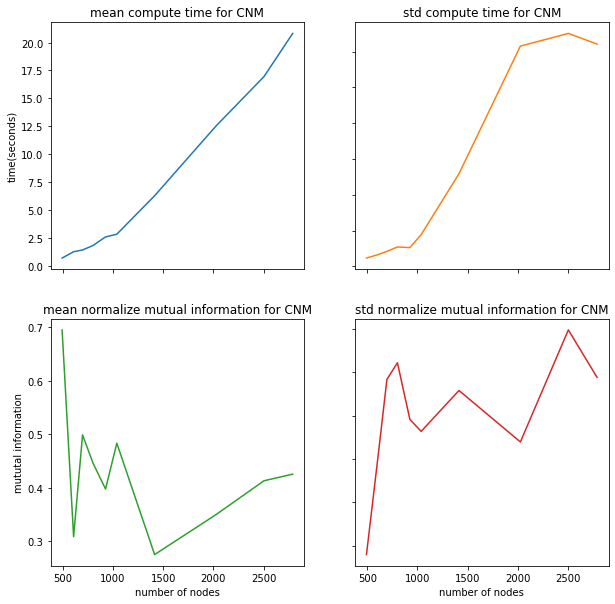

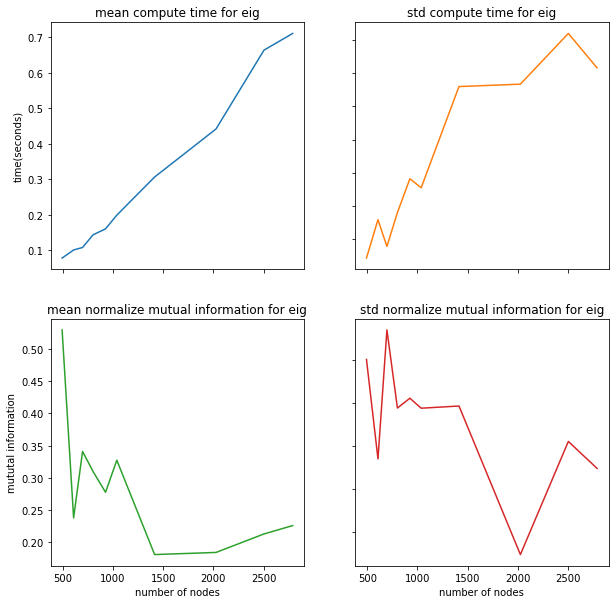

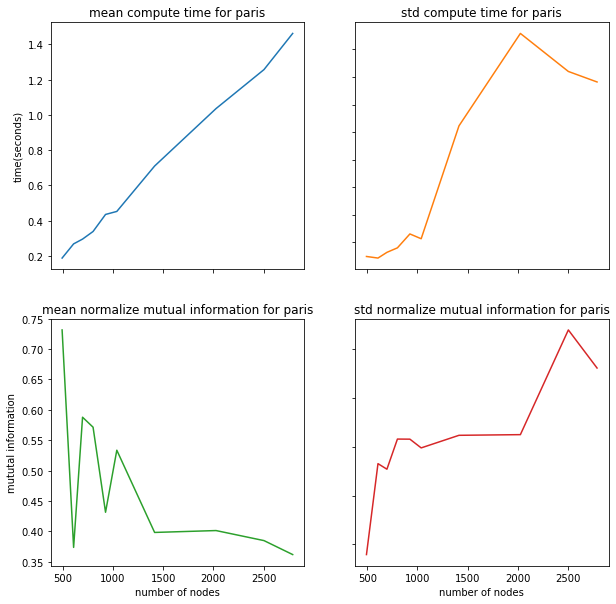

In [167]:

for ca in com_algs:
    running_time_mean = []
    running_time_std = []
    nmi_mean = []
    nmi_std = []
    degree =[]
    for i in range(0,len(metric),num_trails):
        
        running_time_mean.append(np.mean([m[ca][1] for m in metric[i:i+num_trails]]))
        running_time_std.append(np.std([m[ca][1] for m in metric[i:i+num_trails]]))

        nmi_mean.append(np.mean([m[ca][0] for m in metric[i:i+num_trails]]))
        nmi_std.append(np.std([m[ca][0] for m in metric[i:i+num_trails]]))

        degree.append(np.mean([m for m in params[i:i+num_trails]]))
        
   
    
    fig, axs = plt.subplots(2, 2,figsize=(10,10))
    
    axs[0, 0].plot(degree, running_time_mean)
    axs[0, 0].set_title(f"mean compute time for {ca}")
    axs[0, 0].set(xlabel='number of nodes', ylabel='time(seconds)')
    
    axs[0, 1].plot(degree, running_time_std, 'tab:orange')
    axs[0, 1].set_title(f"std compute time for {ca}")
    axs[0, 1].set(xlabel='number of nodes', ylabel='time(seconds)')
    
    axs[1, 0].plot(degree, nmi_mean, 'tab:green')
    axs[1, 0].set_title(f"mean normalize mutual information for {ca}")
    axs[1, 0].set(xlabel='number of nodes', ylabel='mututal information')
    
    axs[1, 1].plot(degree, nmi_std, 'tab:red')
    axs[1, 1].set_title(f"std normalize mutual information for {ca}")
    axs[1, 1].set(xlabel='number of nodes', ylabel='mututal information')

    for ax in axs.flat:
        ax.label_outer()
    plt.savefig(f"result {ca}.png")

In [170]:
for ca in com_algs: 
    print(f"{ca} mean running time : {np.mean([m[ca][1] for m in metric])}")

    print(f"{ca} mean NMI : {np.mean([m[ca][0] for m in metric[i:i+num_trails]])}")


louvain mean running time : 0.5446660327911377
louvain mean NMI : 0.7154018064739944
leiden mean running time : 0.09373801708221435
leiden mean NMI : 0.7087546101503278
CNM mean running time : 6.722778787612915
CNM mean NMI : 0.4254396615786119
eig mean running time : 0.29144677639007566
eig mean NMI : 0.2252524284113623
paris mean running time : 0.6438639831542968
paris mean NMI : 0.36147554231828966


In [118]:
metric

[{'louvain': (1.0000000000000002, 0.051011085510253906),
  'leiden': (1.0000000000000002, 0.032007694244384766),
  'CNM': (0.9916470137207929, 0.19755148887634277),
  'eig': (0.8405084367374998, 0.03700685501098633),
  'paris': (0.9916470137207929, 0.10602474212646484)},
 {'louvain': (1.0000000000000002, 0.05001091957092285),
  'leiden': (1.0000000000000002, 0.014003276824951172),
  'CNM': (0.9916470137207929, 0.19383573532104492),
  'eig': (0.8405084367374998, 0.037008047103881836),
  'paris': (0.9916470137207929, 0.10452938079833984)},
 {'louvain': (1.0000000000000002, 0.05001068115234375),
  'leiden': (1.0000000000000002, 0.014003276824951172),
  'CNM': (0.9916470137207929, 0.19754886627197266),
  'eig': (0.8405084367374998, 0.03600883483886719),
  'paris': (0.9916470137207929, 0.10552859306335449)},
 {'louvain': (1.0000000000000002, 0.05001044273376465),
  'leiden': (1.0000000000000002, 0.015003681182861328),
  'CNM': (0.9916470137207929, 0.19404339790344238),
  'eig': (0.840508436

In [152]:
import pickle 
# filehandler = open('../data/params.obj', 'wb') 
# pickle.dump(params, filehandler)


filehandler = open('../data/metrics2.obj', 'wb') 
pickle.dump(metric, filehandler)

filehandler = open('../data/graphs2.obj', 'wb') 
pickle.dump(graphs, filehandler)

In [64]:
import pickle 
filehandler = open('../data/graphs.obj', 'rb') 
g = pickle.load(filehandler)

In [66]:
g[0].degree

DegreeView({0: 35, 1: 33, 2: 31, 3: 36, 4: 24, 5: 32, 6: 36, 7: 38, 8: 32, 9: 51, 10: 39, 11: 51, 12: 35, 13: 47, 14: 29, 15: 30, 16: 35, 17: 33, 18: 29, 19: 52, 20: 40, 21: 25, 22: 36, 23: 54, 24: 27, 25: 49, 26: 43, 27: 52, 28: 25, 29: 43, 30: 32, 31: 51, 32: 51, 33: 35, 34: 27, 35: 35, 36: 28, 37: 23, 38: 38, 39: 37, 40: 35, 41: 25, 42: 33, 43: 51, 44: 46, 45: 48, 46: 49, 47: 47, 48: 45, 49: 31, 50: 34, 51: 56, 52: 32, 53: 39, 54: 47, 55: 32, 56: 25, 57: 24, 58: 47, 59: 22, 60: 46, 61: 25, 62: 50, 63: 32, 64: 44, 65: 31, 66: 26, 67: 48, 68: 25, 69: 53, 70: 30, 71: 30, 72: 36, 73: 50, 74: 43, 75: 52, 76: 23, 77: 36, 78: 29, 79: 34, 80: 30, 81: 24, 82: 23, 83: 48, 84: 32, 85: 33, 86: 33, 87: 26, 88: 25, 89: 40, 90: 27, 91: 33, 92: 25, 93: 38, 94: 48, 95: 46, 96: 45, 97: 47, 98: 29, 99: 45, 100: 28, 101: 26, 102: 27, 103: 38, 104: 26, 105: 27, 106: 24, 107: 36, 108: 35, 109: 21, 110: 52, 111: 31, 112: 44, 113: 25, 114: 27, 115: 30, 116: 36, 117: 43, 118: 25, 119: 26, 120: 24, 121: 50, 

In [38]:
from __future__ import print_function
import sys
import threading
from time import sleep
try:
    import thread
except ImportError:
    import _thread as thread

In [43]:
def quit_function(fn_name):
    # print to stderr, unbuffered in Python 2.
    print('{0} took too long'.format(fn_name), file=sys.stderr)
    sys.stderr.flush() # Python 3 stderr is likely buffered.
    thread.interrupt_main() # raises KeyboardInterrupt

In [44]:
def exit_after(s):
    '''
    use as decorator to exit process if 
    function takes longer than s seconds
    '''
    def outer(fn):
        def inner(*args, **kwargs):
            timer = threading.Timer(s, quit_function, args=[fn.__name__])
            timer.start()
            try:
                result = fn(*args, **kwargs)
            finally:
                timer.cancel()
            return result
        return inner
    return outer

In [32]:
@exit_after(6)
def generate_graph(n, tau1, tau2, mu, average_degree, min_community):
    G = lfr(
        n, tau1, tau2, mu, average_degree=average_degree, min_community=min_community,seed=10
    )

In [33]:

def generate_random_lfr(
    n_inter,
    tau1_inter,
    tau2_inter,
    mu_inter,
    average_degree_inter,
    min_community_inter,
    max_iter=10,
):
    generated = False
    count = 1
    G = None
    while not generated and count < max_iter:
        count += 1
        try:
            n = np.random.randint(n_inter[0], n_inter[1])
            tau1 = np.random.uniform(tau1_inter[0], tau1_inter[1])
            tau2 = np.random.uniform(tau2_inter[0], tau2_inter[1])
            mu = np.random.uniform(mu_inter[0], mu_inter[1])
            average_degree = np.random.randint(
                average_degree_inter[0], average_degree_inter[1]
            )
            min_community = np.random.randint(
                min_community_inter[0], min_community_inter[1]
            )
            G = generate_graph(82, 3, 1.3, 0.18, average_degree=5, min_community=50)
            generated = True
        except:
            generated = False
            continue
    if not generated:
        raise Exception("Max iter exceeded")

    return G

In [ ]:
generate_random_lfr

In [34]:

G = generate_random_lfr((250,1000), (2,10), (1.1,5), (0.05,0.8), (1,100), (50,800),max_iter=50)

generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph took too long
generate_graph

Exception: Max iter exceeded

In [ ]:
def genrate_lfr_graph(size=250):
    params = {"n":size, "tau1":2, "tau2":1.1, "mu":0.1, "min_degree":20, "max_degree":50}

    G = lfr(params["n"], params["tau1"], params["tau2"], params["mu"], 
                        min_degree=params["min_degree"],
                        max_degree=params["max_degree"],
                        max_iters=5000, seed = 10,
                        )
    print("Generation Completed")
    return G  


sizes = [250, 500, 600, 700, 800, 900, 1000, 1200, 2000, 2500, 2800, 3000]
for n in sizes:
    G = genrate_lfr_graph(size=n)

In [31]:
params = {"n":250, "tau1":2, "tau2":1.1, "mu":0.1, "min_degree":20, "max_degree":50}

G = lfr(params["n"], params["tau1"], params["tau2"], params["mu"], 
                        min_degree=params["min_degree"],
                        max_degree=params["max_degree"],
                        max_iters=5000,
                        )

KeyboardInterrupt: 

In [28]:
G.degree

DegreeView({0: 35, 1: 33, 2: 31, 3: 36, 4: 24, 5: 32, 6: 36, 7: 38, 8: 32, 9: 51, 10: 39, 11: 51, 12: 35, 13: 47, 14: 29, 15: 30, 16: 35, 17: 33, 18: 29, 19: 52, 20: 40, 21: 25, 22: 36, 23: 54, 24: 27, 25: 49, 26: 43, 27: 52, 28: 25, 29: 43, 30: 32, 31: 51, 32: 51, 33: 35, 34: 27, 35: 35, 36: 28, 37: 23, 38: 38, 39: 37, 40: 35, 41: 25, 42: 33, 43: 51, 44: 46, 45: 48, 46: 49, 47: 47, 48: 45, 49: 31, 50: 34, 51: 56, 52: 32, 53: 39, 54: 47, 55: 32, 56: 25, 57: 24, 58: 47, 59: 22, 60: 46, 61: 25, 62: 50, 63: 32, 64: 44, 65: 31, 66: 26, 67: 48, 68: 25, 69: 53, 70: 30, 71: 30, 72: 36, 73: 50, 74: 43, 75: 52, 76: 23, 77: 36, 78: 29, 79: 34, 80: 30, 81: 24, 82: 23, 83: 48, 84: 32, 85: 33, 86: 33, 87: 26, 88: 25, 89: 40, 90: 27, 91: 33, 92: 25, 93: 38, 94: 48, 95: 46, 96: 45, 97: 47, 98: 29, 99: 45, 100: 28, 101: 26, 102: 27, 103: 38, 104: 26, 105: 27, 106: 24, 107: 36, 108: 35, 109: 21, 110: 52, 111: 31, 112: 44, 113: 25, 114: 27, 115: 30, 116: 36, 117: 43, 118: 25, 119: 26, 120: 24, 121: 50, 

In [30]:
G.degree

DegreeView({0: 35, 1: 33, 2: 31, 3: 36, 4: 24, 5: 32, 6: 36, 7: 38, 8: 32, 9: 51, 10: 39, 11: 51, 12: 35, 13: 47, 14: 29, 15: 30, 16: 35, 17: 33, 18: 29, 19: 52, 20: 40, 21: 25, 22: 36, 23: 54, 24: 27, 25: 49, 26: 43, 27: 52, 28: 25, 29: 43, 30: 32, 31: 51, 32: 51, 33: 35, 34: 27, 35: 35, 36: 28, 37: 23, 38: 38, 39: 37, 40: 35, 41: 25, 42: 33, 43: 51, 44: 46, 45: 48, 46: 49, 47: 47, 48: 45, 49: 31, 50: 34, 51: 56, 52: 32, 53: 39, 54: 47, 55: 32, 56: 25, 57: 24, 58: 47, 59: 22, 60: 46, 61: 25, 62: 50, 63: 32, 64: 44, 65: 31, 66: 26, 67: 48, 68: 25, 69: 53, 70: 30, 71: 30, 72: 36, 73: 50, 74: 43, 75: 52, 76: 23, 77: 36, 78: 29, 79: 34, 80: 30, 81: 24, 82: 23, 83: 48, 84: 32, 85: 33, 86: 33, 87: 26, 88: 25, 89: 40, 90: 27, 91: 33, 92: 25, 93: 38, 94: 48, 95: 46, 96: 45, 97: 47, 98: 29, 99: 45, 100: 28, 101: 26, 102: 27, 103: 38, 104: 26, 105: 27, 106: 24, 107: 36, 108: 35, 109: 21, 110: 52, 111: 31, 112: 44, 113: 25, 114: 27, 115: 30, 116: 36, 117: 43, 118: 25, 119: 26, 120: 24, 121: 50, 